In [1]:
!pip install metrics

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.font_manager as fm
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression # 모델 생성 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix # 모델 평가 

In [4]:
path = 'data/'

def load_data(name) :
    data = pd.read_csv(path + name + '.csv')
    data = data.drop(columns='Unnamed: 0')
    return data
    
x_train = load_data('x_train')
x_test = load_data('x_test')
y_train = load_data('y_train')
y_test = load_data('y_test')

In [5]:
# 지연 시간 변수 생성 (all_delay_in_minutes : 도착-출발)
x_train.insert(len(x_train.columns) - 1,'all_delay_in_minutes', x_train['arrival_delay_in_minutes'] - x_train['departure_delay_in_minutes'])
x_test.insert(len(x_test.columns) - 1,'all_delay_in_minutes', x_test['arrival_delay_in_minutes'] - x_test['departure_delay_in_minutes'])

# 출발, 도착 변수 삭제
x_train = x_train.drop(['arrival_delay_in_minutes', 'departure_delay_in_minutes'], axis = 1)
x_test = x_test.drop(['arrival_delay_in_minutes', 'departure_delay_in_minutes'], axis = 1)

x_train # 90640 row, 21 column
# x_test # 38846 row, 21 column

,Gender,customer_type,type_of_travel,customer_class,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,age,flight_distance,all_delay_in_minutes
0,1,0,1,1,1,5,1,3,1,1,...,1,1,2,4,1,5,1,49,954,0.0
1,0,0,0,0,4,4,4,4,3,5,...,4,4,4,4,3,4,4,44,3549,0.0
2,1,1,0,1,5,0,5,2,2,5,...,2,5,3,5,3,4,2,22,650,-3.0
3,1,1,0,0,1,0,1,5,5,1,...,5,3,4,5,3,5,5,26,429,0.0
4,0,1,0,1,1,1,1,2,2,1,...,2,3,5,2,4,3,2,24,852,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90635,1,0,0,0,4,4,4,4,4,5,...,5,5,5,5,4,5,4,42,1795,0.0
90636,1,0,0,0,5,5,5,5,3,2,...,4,4,4,4,1,4,2,39,2275,0.0
90637,1,0,1,1,4,5,5,3,4,5,...,4,3,5,1,2,4,4,12,679,0.0
90638,0,1,0,0,2,2,2,5,1,2,...,1,4,5,4,3,5,1,58,294,0.0


array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'customer_type'}>,
        <AxesSubplot:title={'center':'type_of_travel'}>,
        <AxesSubplot:title={'center':'customer_class'}>,
        <AxesSubplot:title={'center':'inflight_wifi_service'}>],
       [<AxesSubplot:title={'center':'departure_arrival_time_convenient'}>,
        <AxesSubplot:title={'center':'ease_of_online_booking'}>,
        <AxesSubplot:title={'center':'gate_location'}>,
        <AxesSubplot:title={'center':'food_and_drink'}>,
        <AxesSubplot:title={'center':'online_boarding'}>],
       [<AxesSubplot:title={'center':'seat_comfort'}>,
        <AxesSubplot:title={'center':'inflight_entertainment'}>,
        <AxesSubplot:title={'center':'onboard_service'}>,
        <AxesSubplot:title={'center':'leg_room_service'}>,
        <AxesSubplot:title={'center':'baggage_handling'}>],
       [<AxesSubplot:title={'center':'checkin_service'}>,
        <AxesSubplot:title={'center':'inflight_s

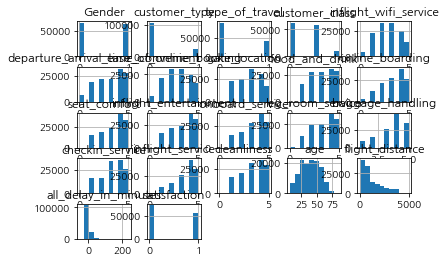

In [6]:
# 히스토그램
data_x = pd.concat([x_train, x_test], axis = 0)
data_y = pd.concat([y_train, y_test], axis = 0)

data = pd.concat([data_x, data_y], axis = 1)
data.hist()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]),
 [Text(1, 0, 'Gender'),
  Text(2, 0, 'customer_type'),
  Text(3, 0, 'type_of_travel'),
  Text(4, 0, 'customer_class'),
  Text(5, 0, 'inflight_wifi_service'),
  Text(6, 0, 'departure_arrival_time_convenient'),
  Text(7, 0, 'ease_of_online_booking'),
  Text(8, 0, 'gate_location'),
  Text(9, 0, 'food_and_drink'),
  Text(10, 0, 'online_boarding'),
  Text(11, 0, 'seat_comfort'),
  Text(12, 0, 'inflight_entertainment'),
  Text(13, 0, 'onboard_service'),
  Text(14, 0, 'leg_room_service'),
  Text(15, 0, 'baggage_handling'),
  Text(16, 0, 'checkin_service'),
  Text(17, 0, 'inflight_service'),
  Text(18, 0, 'cleanliness'),
  Text(19, 0, 'age'),
  Text(20, 0, 'flight_distance'),
  Text(21, 0, 'all_delay_in_minutes')])

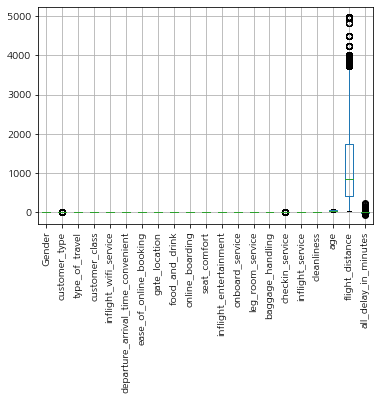

In [7]:
data_x.boxplot()
plt.xticks(rotation=90)

## 함수 선언

In [8]:
# 분류정확도 평가 지표

def con_matrix(model, y_test, y_pred):

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)

    con_mat = confusion_matrix(y_true=y_test, y_pred=y_pred) 
    
    plt.figure(figsize=(6,6))
    sn.heatmap(con_mat, annot=True, fmt=".3f", linewidths=.5, cmap = 'Blues_r', square = True)
    plt.ylabel('Actual label'); 
    plt.xlabel('Predicted label'); 
    all_sample_title = 'Accuracy Score: {:.4f}'.format(accuracy) 
    plt.title(all_sample_title, size = 14) 
    plt.show()
    
    print('Precision:{:.4f}'.format(precision))
    print('Recall: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [9]:
# 변수 중요도

def sensitivity_analysis_LinearReg_LogitReg(task, model, X, idx, bar_plot_yn):
    pd.options.mode.chained_assignment = None

    X_i = X.iloc[idx, :]
    
    X_mat = np.zeros(shape=[X_i.shape[0], X_i.shape[0]])

    for i, j in enumerate(X_i):
        X_mat[i, i] = j

    sensitivity_df = pd.DataFrame({
        'idx': idx
        , 'task': task
        , 'x': X_i
        , 'contribution_x': model.predict(X_mat)     
    })

    sensitivity_df = sensitivity_df.sort_values(by='contribution_x', ascending=True)

    col_n = X_i.shape[0]

    if bar_plot_yn == True:
        sensitivity_df['contribution_x'].plot(kind='barh', figsize=(10, 6), color='skyblue')
        plt.title('로지스틱 회귀 분석에서의 변수 중요도', fontsize=18)
        plt.xlabel('Imfortance', fontsize=16)
        plt.ylabel('Variable', fontsize=16)
        plt.yticks(fontsize=14)
        plt.show()

    return sensitivity_df.sort_values(by='contribution_x', ascending=False)

## 임계값 설정

In [10]:
def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 한다.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)

## 표준화

In [11]:
scaler = StandardScaler()
scaler.fit(x_train)

x_trains = scaler.transform(x_train)
x_tests = scaler.transform(x_test)

x_trains

array([[ 1.01312675, -0.47369298,  1.49659752, ...,  0.63506476,
        -0.2400338 , -0.04360118],
       [-0.98704333, -0.47369298, -0.66818232, ...,  0.30438737,
         2.3579269 , -0.04360118],
       [ 1.01312675,  2.11107203, -0.66818232, ..., -1.15059314,
        -0.54438064, -0.34347299],
       ...,
       [ 1.01312675, -0.47369298,  1.49659752, ..., -1.81194791,
        -0.51534755, -0.04360118],
       [-0.98704333,  2.11107203, -0.66818232, ...,  1.23028405,
        -0.90078681, -0.04360118],
       [ 1.01312675, -0.47369298, -0.66818232, ..., -0.02629002,
         2.1326702 , -0.94321661]])

## 정규화

In [12]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_trainn = scaler.transform(x_train)
x_testn = scaler.transform(x_test)

x_trainn

array([[1.        , 0.        , 1.        , ..., 0.53846154, 0.18638934,
        0.20769231],
       [0.        , 0.        , 0.        , ..., 0.47435897, 0.71042003,
        0.20769231],
       [1.        , 1.        , 0.        , ..., 0.19230769, 0.125     ,
        0.19615385],
       ...,
       [1.        , 0.        , 1.        , ..., 0.06410256, 0.13085622,
        0.20769231],
       [0.        , 1.        , 0.        , ..., 0.65384615, 0.05310985,
        0.20769231],
       [1.        , 0.        , 0.        , ..., 0.41025641, 0.66498384,
        0.17307692]])

## 변수 중요도 추출

Optimization terminated successfully.
         Current function value: 0.371165
         Iterations 7


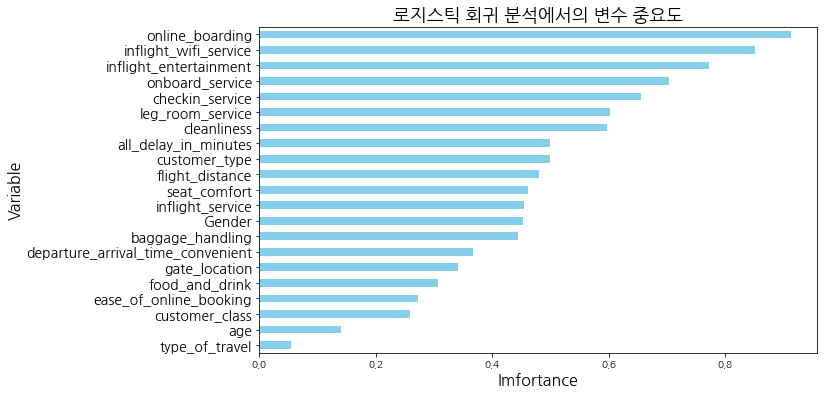

,idx,task,x,contribution_x
online_boarding,0,LogitReg,5.0,0.912525
inflight_wifi_service,0,LogitReg,4.0,0.851339
inflight_entertainment,0,LogitReg,4.0,0.772979
onboard_service,0,LogitReg,4.0,0.703433
checkin_service,0,LogitReg,3.0,0.655837
leg_room_service,0,LogitReg,4.0,0.602080
cleanliness,0,LogitReg,4.0,0.596793
all_delay_in_minutes,0,LogitReg,0.0,0.500000
customer_type,0,LogitReg,0.0,0.500000
flight_distance,0,LogitReg,304.0,0.480034


In [13]:
logitreg = sm.Logit(y_train, x_train)
logitreg_fit = logitreg.fit()

sensitivity_analysis_LinearReg_LogitReg(task="LogitReg"
                                        , model=logitreg_fit
                                        , X=x_test
                                        , idx=0
                                        , bar_plot_yn=True)

## 로지스틱 모델

In [14]:
def logisticModel(x_train, x_test, y_train, y_test) :
    model = LogisticRegression(random_state=0, multi_class='multinomial')

    model.fit(X=x_train, y=y_train)

    y_pred = model.predict(X=x_test)
    con_matrix(model, y_test, y_pred)

    print("Train_Accuracy : ", model.score(x_train, y_train))
    print("Test_Accuracy : ", model.score(x_test, y_test), '\n')

In [15]:
len(x_trainn), len(y_train)

(90640, 90640)

## 표준화 x, 정규화 x

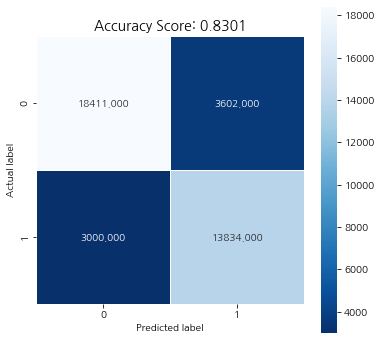

Precision:0.7934
Recall: 0.8218
F1: 0.8074
AUC: 0.8291
Train_Accuracy :  0.831409973521624
Test_Accuracy :  0.8300512266069452 



In [16]:
logisticModel(x_train, x_test, y_train, y_test)

## 표준화 x, 정규화 o

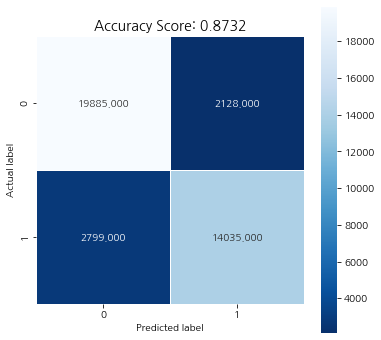

Precision:0.8683
Recall: 0.8337
F1: 0.8507
AUC: 0.8685
Train_Accuracy :  0.874040158870256
Test_Accuracy :  0.8731690992869462 



In [17]:
logisticModel(x_trainn, x_testn, y_train, y_test)

## 표준화 o, 정규화 x

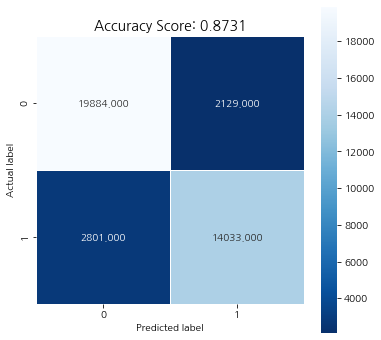

Precision:0.8683
Recall: 0.8336
F1: 0.8506
AUC: 0.8684
Train_Accuracy :  0.8740953221535745
Test_Accuracy :  0.8730918732463253 



In [18]:
logisticModel(x_trains, x_tests, y_train, y_test)

## 표준화 o, 정규화 o

In [19]:
scaler = MinMaxScaler()
scaler.fit(x_trains)
x_trainsn = scaler.transform(x_trains)
x_testsn = scaler.transform(x_tests)
x_trainsn

array([[1.        , 0.        , 1.        , ..., 0.53846154, 0.18638934,
        0.20769231],
       [0.        , 0.        , 0.        , ..., 0.47435897, 0.71042003,
        0.20769231],
       [1.        , 1.        , 0.        , ..., 0.19230769, 0.125     ,
        0.19615385],
       ...,
       [1.        , 0.        , 1.        , ..., 0.06410256, 0.13085622,
        0.20769231],
       [0.        , 1.        , 0.        , ..., 0.65384615, 0.05310985,
        0.20769231],
       [1.        , 0.        , 0.        , ..., 0.41025641, 0.66498384,
        0.17307692]])

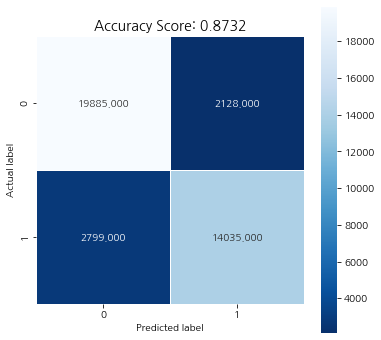

Precision:0.8683
Recall: 0.8337
F1: 0.8507
AUC: 0.8685
Train_Accuracy :  0.874040158870256
Test_Accuracy :  0.8731690992869462 



In [20]:
logisticModel(x_trainsn, x_testsn, y_train, y_test)

표준화와 정규화를 모두 거친 데이터셋의 정확도와 정규화만 거친 데이터셋의 정확도가 동일하므로, x_trainn, x_testn을 x_train, x_test에 저장

In [21]:
x_train = x_trainn
x_test = x_testn

## 변수 선택

In [22]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, SelectFromModel, f_regression

# target(satisfaction)와 가장 correlated 된 features 를 k개 고르기..
predict = pd.DataFrame(columns = ['train', 'test'])
train_list = []
test_list = []

for i in range(1, 22) :
    selector = SelectKBest(score_func=f_regression, k=i) ## selctor 정의하기

    x_train_selected = selector.fit_transform(x_train, y_train) ## 학습데이터에 fit_transform 
    x_test_selected = selector.transform(x_test) ## 테스트 데이터는 transform

    model = LogisticRegression()
    model.fit(x_train_selected, y_train)
    
    train_list.append(model.score(x_train_selected, y_train))
    test_list.append(model.score(x_test_selected, y_test))
    
predict['train'] = train_list
predict['test'] = test_list
predict

,train,test
0,0.786419,0.787809
1,0.843049,0.843463
2,0.811342,0.812238
3,0.830958,0.831390
4,0.830958,0.831338
5,0.846547,0.847710
6,0.847065,0.848019
7,0.850375,0.851031
8,0.850706,0.850516
9,0.853244,0.853425


In [23]:
# 예측 정확도 가장 높은 변수 개수 탐색
if train_list.index(max(train_list)) == test_list.index(max(test_list)) :
    optIndex = train_list.index(max(train_list))
    print(optIndex, max(train_list), max(test_list))
else :
    optIndex = int((train_list.index(max(train_list)) + test_list.index(max(test_list))) / 2)
    print(optIndex, max(train_list), max(test_list))

18 0.8742718446601941 0.8735552294900507


In [24]:
# target(satisfaction)와 가장 correlated 된 features 18개 선택

selector = SelectKBest(score_func=f_regression, k=optIndex) ## selctor 정의하기

x_train_selected = selector.fit_transform(x_train, y_train) ## 학습데이터에 fit_transform 
x_test_selected = selector.transform(x_test) ## 테스트 데이터는 transform

x_train_selected.shape, x_test_selected.shape

((90640, 18), (38847, 18))

선택된 변수를 각각 x_train, x_test 변수에 저장

In [25]:
x_train = x_train_selected
x_test = x_test_selected

# 학습결과 평가

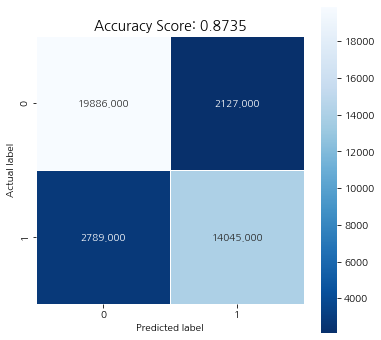

Precision:0.8685
Recall: 0.8343
F1: 0.8511
AUC: 0.8688


In [26]:
log_reg = LogisticRegression(random_state=0, multi_class='multinomial')

log_reg.fit(X=x_train, y=y_train)

y_pred = log_reg.predict(X=x_test)
con_matrix(log_reg, y_test, y_pred)

AUC: 0.8688493356888094


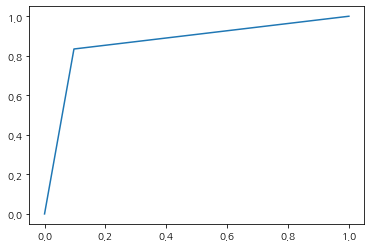

In [27]:
# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## Logit 함수 적용

In [28]:
model = sm.Logit(y_train, x_train)
result = model.fit(method = "newton")    # 뉴턴 방법 적용한 로지스틱 회귀 모형

y_pred = result.predict(x_test)

pred_Y = cut_off(y_pred, 0.5)
pred_Y

Optimization terminated successfully.
         Current function value: 0.377315
         Iterations 7


array([0, 1, 1, ..., 1, 0, 0])

AUC: 0.9070967013287173


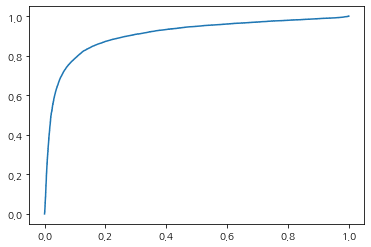

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label = 1)

plt.plot(fpr,tpr)

auc = np.trapz(tpr,fpr)
print("AUC:",auc)

# 하이퍼파라미터 튜닝

In [30]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()

parameters = {'penalty': ['l1', 'l2'], 'C':[0.001,.009, 0.01, .09, 1, 5, 10, 25]}

grid_clf_acc = GridSearchCV(clf, param_grid = parameters, scoring = 'recall')
grid_clf_acc.fit(x_train, y_train)

y_pred_acc = grid_clf_acc.predict(x_test)

In [31]:
print('최적 하이퍼 파라미터: \n', grid_clf_acc.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_clf_acc.best_score_))

최적 하이퍼 파라미터: 
 {'C': 5, 'penalty': 'l2'}
최고 예측 정확도: 0.8367


In [32]:
from sklearn.model_selection import cross_val_score, cross_validate
model = LogisticRegression()

# 교차검증
scores = cross_val_score(model, x_train, y_train, cv = 5)
scores

pd.DataFrame(cross_validate(model, x_train, y_train, cv = 5))
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.8739408649602824
